In [82]:
import json
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
pattern_ = '''((0, 2, 4), {'010': '0', '011': '0', '000': '1', '110': '0', '001': '0'})
((0, 1, 11), {'000': '0', '101': '0', '001': '1', '011': '1', '010': '0'})
((0, 2, 14), {'010': '1', '011': '0', '000': '1', '110': '0', '001': '0'})
((3, 7), {'01': '1', '10': '0', '00': '0'})
((2, 4, 7), {'101': '1', '110': '0', '000': '0', '010': '1', '011': '0', '100': '0'})
((3, 5), {'01': '1', '11': '0', '00': '1'})
((0, 6, 9), {'001': '0', '000': '0', '101': '1', '010': '1', '011': '0'})
((2, 3, 7), {'101': '0', '110': '0', '000': '1', '010': '1', '001': '0', '100': '1'})
((1, 5, 8), {'010': '0', '000': '1', '011': '1', '101': '0', '110': '1', '001': '0'})
((1, 5, 9), {'011': '0', '010': '0', '000': '1', '100': '0', '110': '1', '001': '1'})
((10, 13), {'11': '1', '10': '0', '00': '0', '01': '1'})
((1, 2, 11), {'010': '0', '000': '1', '011': '1', '001': '1', '101': '0', '110': '0'})
((0, 12), {'00': '0', '10': '1', '01': '0'})
((0, 7, 13), {'011': '0', '000': '0', '110': '0', '010': '1', '001': '1'})
((1, 5, 14), {'010': '1', '011': '0', '000': '0', '100': '0', '110': '0'})
((0, 11, 15), {'000': '0', '110': '0', '010': '1', '011': '1', '001': '0'})'''

In [64]:
def get_pattern(pattern_:str) -> list:
    pattern = list()
    for line in pattern_.split('\n'):
        try:
            l = line[1:-1].split('), ')
            l[0] = l[0].replace('(', '')
            l[0] = [int(x) for x in l[0].split(", ")]
            l[1] = l[1].replace("'", '"')
            l[1] = json.loads(l[1])
            pattern.append((tuple(l[0]), l[1]))
        except Exception as e:
            print(e)
    return pattern

In [70]:
def get_nodes(pattern:list) -> list:
    nodes = set()
    for p in pattern:
        nodes.update(p[0])
    return list(nodes)


In [75]:
def get_edges(pattern:list) -> list:
    edges = set()
    for p in pattern:
        n1 = p[0][0]
        for n2 in p[0][1:]:
            edges.add((n1, n2))
    return list(edges)


In [71]:
pattern = get_pattern(pattern_)

In [76]:
nodes = get_nodes(pattern)
edges = get_edges(pattern)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

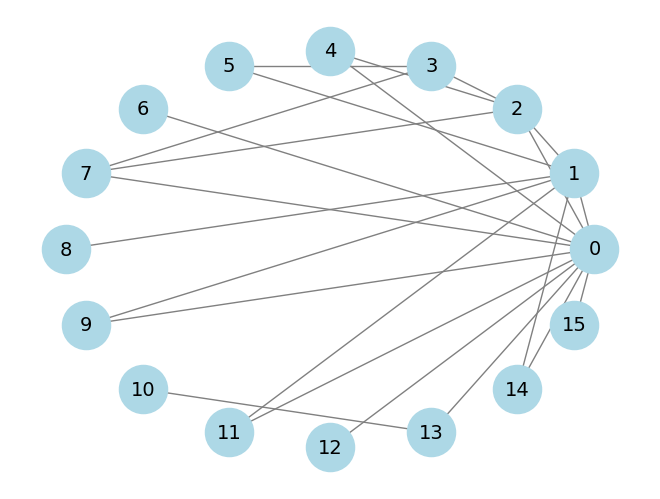

In [81]:
# Get positions using a circular layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=14)

# Show plot
plt.show()

Text(0.5, 0, 'Degree')

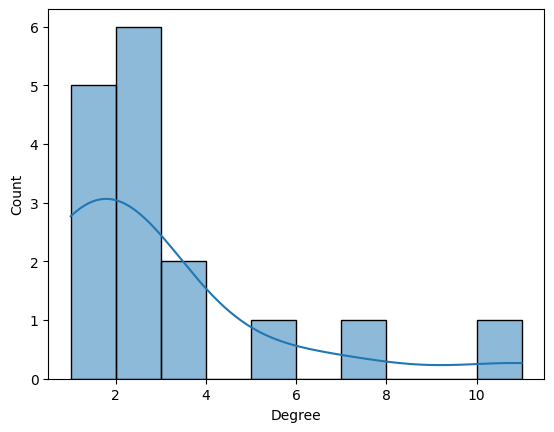

In [85]:
# Get degree sequence
degrees = [deg for node, deg in G.degree()]

ax = sns.histplot(degrees, bins=range(min(degrees), max(degrees) + 1), kde=True)
ax.set_xlabel('Degree')